## Topic 6: Bar Plots

### i. Libraries and Dependencies

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

### ii. Flights Dataset

This dataset includes the total count of passengers on airline flights for each month from 1949 to 1960.

#### Read in dataset using Seaborn and assign to variable `sns.load_dataset('flights')`

In [80]:
df0=sns.load_dataset('flights')

In [81]:
df0.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


#### How many records/rows are in this dataset?

In [82]:
len(df0)

144

In [83]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
year          144 non-null int64
month         144 non-null category
passengers    144 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.9 KB


#### Print a DataFrame of 3 columns: year, month and count of passengers but *only* for the months of December

In [84]:
df=df0[df0.month=='December']
df.head()

,year,month,passengers
11,1949,December,118
23,1950,December,140
35,1951,December,166
47,1952,December,194
59,1953,December,201


**version 0**

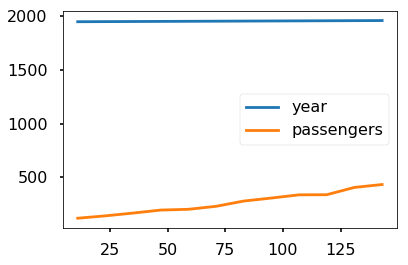

In [85]:
df.plot()

#### iii.  Plot the count of passengers on the flights in December (of each year) over time

> <li> This should be a bar graph because each year's December count of passengers essentially represents a summed-up or total value of all passengers. (Alternatively, it could be a line plot but I prefer bar plots for this situation.)
> <li>x-axis ticks each represent December for a specific year
> <li> on the x-axis, years should progress from left to right in increasing order from 1949 to 1960
> <li> y-axis should be the count of passengers for flights
> <li>  make the figure size larger than the default
> <li>  provide a proper label for the title, x-label and y-label
> <li>  make the font larger for default on the x-ticks, y-ticks, x-label, y-label and title so it's more easily readable
> <li> change the color of the bars to a different dark color (not the default blue)

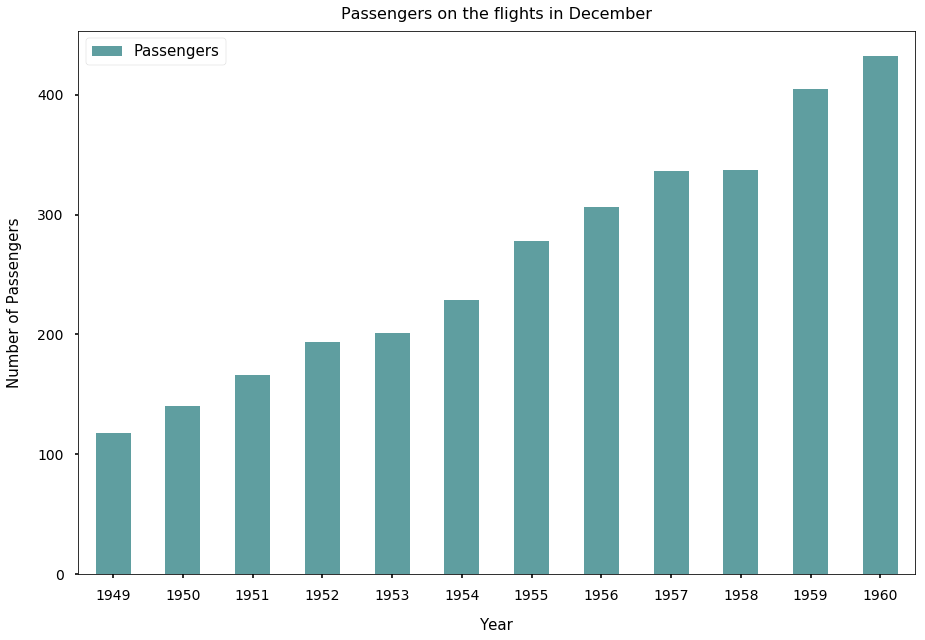

In [68]:
sns.set_context("poster")
df.set_index('year')['passengers'].plot(kind='bar',figsize=(15,10), \
                                        color='cadetblue',label='Passengers')
plt.title('Passengers on the flights in December',size=16,y=1.01)
plt.xlabel('Year', size=15, labelpad=15)
plt.xticks(range(len(df)), df['year'], fontsize=14, rotation='horizontal')
plt.ylabel('Number of Passengers', size=15, labelpad=15)
plt.yticks(fontsize=14)
plt.legend(fontsize=15)

#### Based on looking at the plot above, which year had the most number of passengers on flights for the month of December? How many passengers were on all flights then?

In [90]:
df0[df0.year==1960][df0.month=='December']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,year,month,passengers
143,1960,December,432


In [92]:
df0[df0['month']=='December'].sort_values(by='passengers', ascending=False).iloc[0]

year              1960
month         December
passengers         432
Name: 143, dtype: object

#### Given your original DataFrame, create a new column that's the percent change year over year for *specific months*

The count of passengers for flights in **December of 1949** is 118 and the count of passengers for flights in **December of 1950** is 140. Therefore, the % change for count of passengers from the previous year's  same-month value is:  

(140-118)/140*100 = 18.65

> Can use the `pct_change()` method in Pandas. You'll have to use the `periods` argument and set in a new value from the default. If you're not sure you used `pct_change()` correctly, you can compare the value above, 18.65%, with the value you see in your new column for December of 1950.    

In [117]:
df0['passengers_yearly_month_pct_change'] = df0['passengers'].pct_change(periods=12)*100

In [118]:
df0[df0['month']=='December']

,year,month,passengers,passengers_yearly_month_pct_change
11,1949,December,118,NaN
23,1950,December,140,18.644068
35,1951,December,166,18.571429
47,1952,December,194,16.867470
59,1953,December,201,3.608247
71,1954,December,229,13.930348
83,1955,December,278,21.397380
95,1956,December,306,10.071942
107,1957,December,336,9.803922
119,1958,December,337,0.297619


### Plot the `pct_change_increase` column over time for the months of February. % change values > 0 should be a dark blue and % change values < 0 should be red (to denote negative)

> <li> a bar plot. (Alternatively, you could just put a horizontal line to represent the % change values rather than a bar - but I find a shaded bar easier to see on a plot.)
> <li> x-axis ticks each represent the months of February over all years provided in the dataset
> <li> on the x-axis, years should progress from left to right in increasing order from 1949 to 1960
> <li> y-axis should be % change value from the column `pct_change_increase` 
> <li> provide a proper label for the title, x-label and y-label
> <li> make the figure size larger
> <li> make the font larger for default on the x-ticks, y-ticks, x-label, y-label and title so it's more easily readable
> <li> for `pct_change_increase` values greater than 0, please make the bar colors a dark blue, and for bar colors less than 0, please make them red.* (explanation below)
> <li>only show years 1950 to 1960 (not 1949) because we have no numerical value for 1949.

In [127]:
df_feb_change=df0[df0['month']=='February'][1:]
df_feb_change.head()

,year,month,passengers,passengers_yearly_month_pct_change
13,1950,February,126,6.779661
25,1951,February,150,19.047619
37,1952,February,180,20.000000
49,1953,February,196,8.888889
61,1954,February,188,-4.081633


In [139]:
colors=[]
for value in df_feb_change.passengers_yearly_month_pct_change:
    if value<0:
        colors.append('red')
    else: 
        colors.append('darkslateblue')
colors

['darkslateblue',
 'darkslateblue',
 'darkslateblue',
 'darkslateblue',
 'red',
 'darkslateblue',
 'darkslateblue',
 'darkslateblue',
 'darkslateblue',
 'darkslateblue',
 'darkslateblue']

In [152]:
df_feb_change.year

13     1950
25     1951
37     1952
49     1953
61     1954
73     1955
85     1956
97     1957
109    1958
121    1959
133    1960
Name: year, dtype: int64

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 <a list of 7 Text yticklabel objects>)

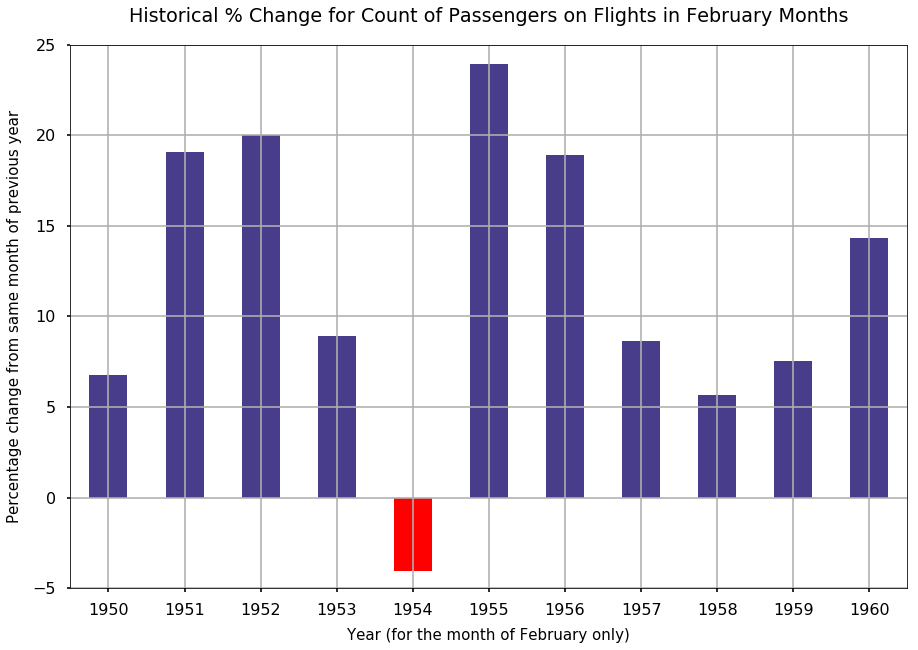

In [162]:
df_feb_change.passengers_yearly_month_pct_change.plot\
(kind='bar',grid=True, figsize=(15,10),color=colors,ylim=(-5, 25))
plt.title('Historical % Change for Count of Passengers on Flights in February Months', y=1.03)
plt.xlabel('Year (for the month of February only)',fontsize=15,labelpad=10)
plt.ylabel('Percentage change from same month of previous year',fontsize=15, labelpad=10)
plt.xticks(range(len(df_feb_change.year)), df_feb_change.year, rotation='horizontal')
plt.yticks()

#### Hint: how to change bar colors

Pandas Plot has an argument for `color`. You could pass a single value like `red` or a list of values. Hypothetically, let's say you had a bar plot with 3 bars. If you pass 3 colors to the `color` argument such as `['blue', 'red', 'blue']`, the 1st and 3rd bars will be blue and the middle bar will be red. We can use similar logic for our plot below.

How do we get a list of colors like that for our plot below? First create an empty Python list to store our color values. For the `pct_change_increase` values in the month of February, we can assess if the value is greater than or less than 0. Loop over the `pct_change_increase` values; if it's greater than 0, append a value to your list of a dark blue color, otherwise append a value of red. Then, use that Python list as the value to the `color` argument in our plot method.

Hint: the initial code to loop over a field is simply `for value in df['column_name']:`